### Data Manipulation of Sales Data

* The commands that I am using for this project :
    * df.head()
    * df.dtypes()
    * df.describe()
    * df.shape
    * df['col_name'].value_counts()
    * df['col_name'].unique()
* Operations on Date column
    * df['date_col'] = pd.to_datetime(df['date_col'])
    * df['year'] = df['date_col'].dt.year
    * df['dayname'] = df['date_col'].dt.day_name()
    * df['month'] = df['date_col'].dt.month_name()
    * df['day_number'] = df['date_col'].dt.day #Deafault starts from Mon-0, Tues=1..Sun-6

    * df.drop(columns = ['col1','col2'], inplace=True) #to drop multiple cols
    
#### Handling Missing Values

* Identifing missing values 
     * df.isnull().sum()/df[df.isnull.sum()]
* Updating missing values, manually based on exising data
     *  solution 1 - df.loc[row_index, col_name] = 'value to be updated'
     *  solution 2 - df.loc[df['col_name'].isnull(), 'col_name'] = 'value to be updated'

#### Handling Outliers

* Identifying outliers on daily Sales using scatter plot on 'sales' vs 'day of the month'
    * fig, ax = plt.subplots(figsize=(16, 8))
    * ax.scatter(df['day'], df['sales'])
    * ax.set_xlabel("Day of the Month")
    * ax.set_ylabel("Sales")
    * plt.show()

    * print all outliers in a dataframe based on criteria
        * df[df['col_name'] >10000]
    * Replacing outlier with NaN
         * df.loc[df['col_name']>10000, 'col_name'] = np.NaN
    * verify scatter plot after updating outliers

### Answering Key BUSINESS QUESTIONs

* Q1 Weekday Stats on below
    * a. Sum of Sales by week day
    * b. Sum of revenue by week day
    * c. Average revenue by week day

        * solution 1 - df.groupby('week_day').agg({'sales':'sum','revenue':['sum','mean']})
        * solution 2 - data.groupby('week_day')[['sales','revenue']].agg(['sum','mean'])

* Q2 Compute the percentage contribution to the overall revenue by day
    * solution 1 - df['percentage'] = df['revenue']/df['revenue'].sum() * 100
    * print dataframe df.head()

  


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
sales = pd.read_csv(r'C:\Savithri\HyperIsland\DA23_Projects\Project6_Python\DataManipulation_Emmanuel\dummy_data_sales - sales.csv')

In [253]:
sales.head(2)

,id,date,emp_id,product_id,sales,price
0,1,01/01/2019,A1,P1,30,11.5
1,2,01/02/2019,A1,P1,28,11.5


In [254]:
sales.shape

(31, 6)

In [255]:
sales.dtypes

id              int64
date           object
emp_id         object
product_id     object
sales           int64
price         float64
dtype: object

In [256]:
sales.describe()

,id,sales,price
count,31.000000,31.000000,30.0
mean,16.000000,3046.032258,11.5
std,9.092121,11912.803397,0.0
min,1.000000,27.000000,11.5
25%,8.500000,43.000000,11.5
50%,16.000000,50.000000,11.5
75%,23.500000,58.500000,11.5
max,31.000000,57000.000000,11.5


In [257]:
sales.isnull().sum() #Missing values

id            0
date          3
emp_id        0
product_id    0
sales         0
price         1
dtype: int64

In [258]:
sales.head(2)

,id,date,emp_id,product_id,sales,price
0,1,01/01/2019,A1,P1,30,11.5
1,2,01/02/2019,A1,P1,28,11.5


### Handling Missing values

#### Identiyfing Missing values

In [259]:
#Filter for missing dates 
#solution1 
filter_missing_date = sales['date'].isnull()
sales.loc[filter_missing_date]

,id,date,emp_id,product_id,sales,price
7,8,NaN,A1,P1,40,11.5
18,19,NaN,A1,P1,56,11.5
24,25,NaN,A1,P1,65,11.5


In [260]:
#solution 2
sales[sales.date.isnull()]

,id,date,emp_id,product_id,sales,price
7,8,NaN,A1,P1,40,11.5
18,19,NaN,A1,P1,56,11.5
24,25,NaN,A1,P1,65,11.5


In [261]:
len(sales['date'].unique())

29

In [262]:
sales

,id,date,emp_id,product_id,sales,price
0,1,01/01/2019,A1,P1,30,11.5
1,2,01/02/2019,A1,P1,28,11.5
2,3,01/03/2019,A1,P1,43,11.5
3,4,01/04/2019,A1,P1,45,11.5
4,5,01/05/2019,A1,P1,57,11.5
5,6,01/06/2019,A1,P1,33,11.5
6,7,01/07/2019,A1,P1,27,11.5
7,8,NaN,A1,P1,40,11.5
8,9,01/09/2019,A1,P1,41,11.5
9,10,01/10/2019,A1,P1,36000,11.5


In [263]:
sales.loc[7, 'date']

nan

### Updating missing values, manually based on exising data

In [264]:
sales.loc[7, 'date'] = '2019-01-08'

In [265]:
sales[sales.date.isnull()]

,id,date,emp_id,product_id,sales,price
18,19,NaN,A1,P1,56,11.5
24,25,NaN,A1,P1,65,11.5


In [266]:
sales.loc[18, 'date'] = '2019-01-25'

In [267]:
sales.loc[24, 'date'] = '2019-01-19'

In [268]:
sales[sales.date.isnull()]

,id,date,emp_id,product_id,sales,price


In [269]:
sales[sales.price.isnull()]

,id,date,emp_id,product_id,sales,price
15,16,01/16/2019,A1,P1,51,NaN


In [270]:
sales

,id,date,emp_id,product_id,sales,price
0,1,01/01/2019,A1,P1,30,11.5
1,2,01/02/2019,A1,P1,28,11.5
2,3,01/03/2019,A1,P1,43,11.5
3,4,01/04/2019,A1,P1,45,11.5
4,5,01/05/2019,A1,P1,57,11.5
5,6,01/06/2019,A1,P1,33,11.5
6,7,01/07/2019,A1,P1,27,11.5
7,8,2019-01-08,A1,P1,40,11.5
8,9,01/09/2019,A1,P1,41,11.5
9,10,01/10/2019,A1,P1,36000,11.5


In [271]:
sales.loc[15, 'price'] =11.5

In [272]:
sales[sales.price.isnull()]

,id,date,emp_id,product_id,sales,price


In [273]:
sales.isnull().sum()

id            0
date          0
emp_id        0
product_id    0
sales         0
price         0
dtype: int64

In [274]:
sales.dtypes

id              int64
date           object
emp_id         object
product_id     object
sales           int64
price         float64
dtype: object

### Operations on Date column

In [275]:
sales.date = pd.to_datetime(sales.date)

In [276]:
sales.dtypes

id                     int64
date          datetime64[ns]
emp_id                object
product_id            object
sales                  int64
price                float64
dtype: object

In [277]:
sales.head(2)

,id,date,emp_id,product_id,sales,price
0,1,2019-01-01,A1,P1,30,11.5
1,2,2019-01-02,A1,P1,28,11.5


In [278]:
#Actual weekday(Mon-Sun)
sales.date.dt.year

0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2019
20    2019
21    2019
22    2019
23    2019
24    2019
25    2019
26    2019
27    2019
28    2019
29    2019
30    2019
Name: date, dtype: int64

In [279]:
#Actual weekday(Mon-Sun)
sales['year'] = sales.date.dt.year

In [280]:
sales['month'] = sales.date.dt.month_name()

In [281]:
sales['week_day'] = sales.date.dt.day_name()

In [282]:
sales['day'] = sales.date.dt.day

In [283]:
sales.head(2)

,id,date,emp_id,product_id,sales,price,year,month,week_day,day
0,1,2019-01-01,A1,P1,30,11.5,2019,January,Tuesday,1
1,2,2019-01-02,A1,P1,28,11.5,2019,January,Wednesday,2


In [284]:
sales.drop(columns = ['id','date'], axis=1, inplace=True)

In [285]:
sales.head(2)

,emp_id,product_id,sales,price,year,month,week_day,day
0,A1,P1,30,11.5,2019,January,Tuesday,1
1,A1,P1,28,11.5,2019,January,Wednesday,2


### Handling Outliers

### Finding outliers using scatter plot/Box plot/statistical plots

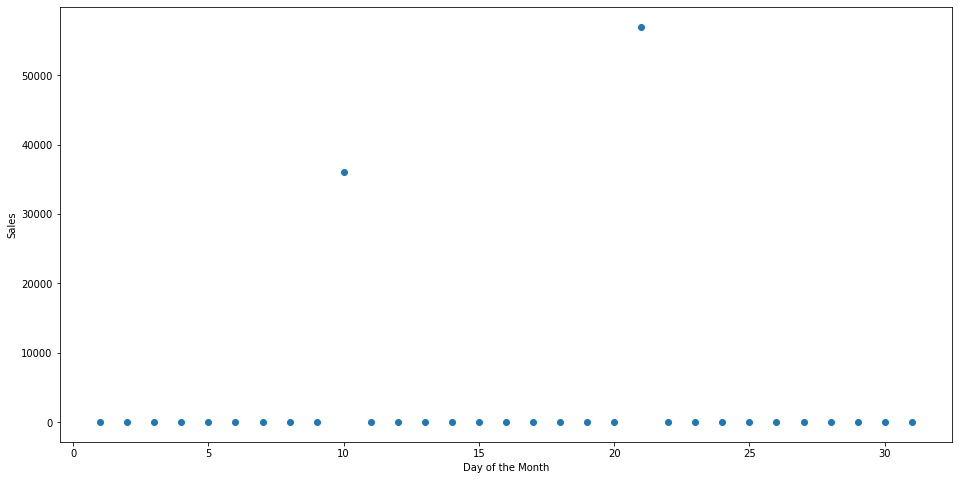

In [286]:
#Here I am using Scatter plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(sales['day'], sales['sales'])
ax.set_xlabel("Day of the Month")
ax.set_ylabel("Sales")
plt.show()


In [148]:
#Printing outliers in  a dataframe
sales[sales['sales']>10000]


,emp_id,product_id,sales,price,year,month,week_day,day
9,A1,P1,36000,11.5,2019,January,Thursday,10
20,A1,P1,57000,11.5,2019,January,Monday,21


### Updating outliers with NaN

In [149]:
sales.loc[sales['sales']>10000, 'sales'] = np.NaN

In [155]:
sales[sales['sales']>10000]

,emp_id,product_id,sales,price,year,month,week_day,day,revenue


In [151]:
sales.head

<bound method NDFrame.head of    emp_id product_id  sales  price  year    month   week_day  day
0      A1         P1   30.0   11.5  2019  January    Tuesday    1
1      A1         P1   28.0   11.5  2019  January  Wednesday    2
2      A1         P1   43.0   11.5  2019  January   Thursday    3
3      A1         P1   45.0   11.5  2019  January     Friday    4
4      A1         P1   57.0   11.5  2019  January   Saturday    5
5      A1         P1   33.0   11.5  2019  January     Sunday    6
6      A1         P1   27.0   11.5  2019  January     Monday    7
7      A1         P1   40.0   11.5  2019  January    Tuesday    8
8      A1         P1   41.0   11.5  2019  January  Wednesday    9
9      A1         P1    NaN   11.5  2019  January   Thursday   10
10     A1         P1   44.0   11.5  2019  January     Friday   11
11     A1         P1   46.0   11.5  2019  January   Saturday   12
12     A1         P1   47.0   11.5  2019  January     Sunday   13
13     A1         P1   48.0   11.5  2019  Janu

### Verify Scatter plot after handling outliers

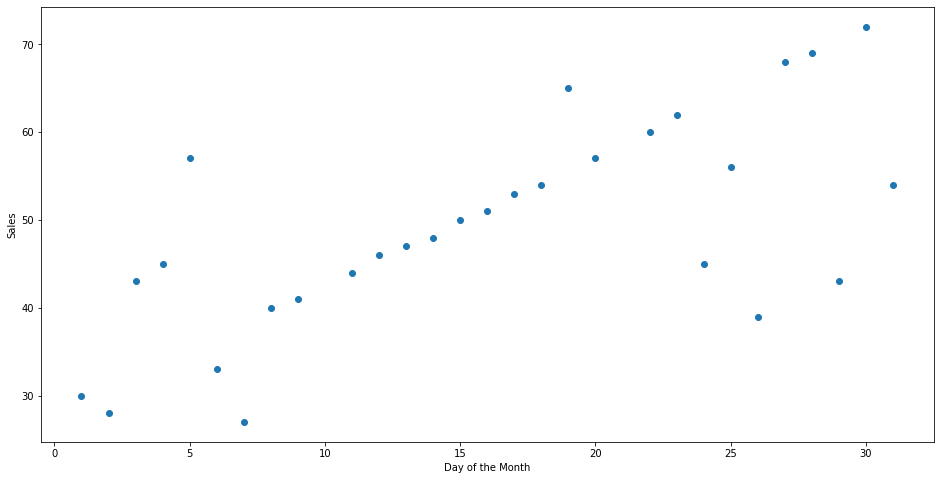

In [152]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(sales['day'], sales['sales'])
ax.set_xlabel("Day of the Month")
ax.set_ylabel("Sales")
plt.show()

In [153]:
sales['revenue'] = sales['sales']*sales.price

In [156]:
sales.head(2)

,emp_id,product_id,sales,price,year,month,week_day,day,revenue
0,A1,P1,30.0,11.5,2019,January,Tuesday,1,345.0
1,A1,P1,28.0,11.5,2019,January,Wednesday,2,322.0


### Answering Key BUSINESS QUESTIONs

### Q1 Weekday Stats on below
#### a. Sum of Sales by week day
#### b. Sum of revenue by week day
#### c. Average revenue by week day

In [176]:
#solution1 
sales.groupby('week_day').agg({'sales':'sum','revenue':['sum', 'mean']})

sales revenue         
             sum     sum     mean
week_day                         
Friday     199.0  2288.5  572.125
Monday     144.0  1656.0  552.000
Saturday   207.0  2380.5  595.125
Sunday     205.0  2357.5  589.375
Thursday   195.0  2242.5  560.625
Tuesday    223.0  2564.5  512.900
Wednesday  254.0  2921.0  584.200

In [189]:
#solution2
sales.groupby('week_day')[['sales','revenue']].agg(['sum','mean'])


sales        revenue         
             sum   mean     sum     mean
week_day                                
Friday     199.0  49.75  2288.5  572.125
Monday     144.0  48.00  1656.0  552.000
Saturday   207.0  51.75  2380.5  595.125
Sunday     205.0  51.25  2357.5  589.375
Thursday   195.0  48.75  2242.5  560.625
Tuesday    223.0  44.60  2564.5  512.900
Wednesday  254.0  50.80  2921.0  584.200

In [158]:
#solution 3
sales.groupby('week_day')['sales','revenue'].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,sales,revenue
week_day,,
Friday,199.0,2288.5
Monday,144.0,1656.0
Saturday,207.0,2380.5
Sunday,205.0,2357.5
Thursday,195.0,2242.5
Tuesday,223.0,2564.5
Wednesday,254.0,2921.0


In [159]:
sales.groupby('week_day')['price'].mean()

week_day
Friday       11.5
Monday       11.5
Saturday     11.5
Sunday       11.5
Thursday     11.5
Tuesday      11.5
Wednesday    11.5
Name: price, dtype: float64

In [188]:
sales.head(2)

,emp_id,product_id,sales,price,year,month,week_day,day,revenue,percentage
0,A1,P1,30.0,11.5,2019,January,Tuesday,1,345.0,2.102313
1,A1,P1,28.0,11.5,2019,January,Wednesday,2,322.0,1.962158


### Q2. Compute the percentage contribution to the overall sales by day(which day the sales are peak?)

In [179]:
sales['revenue'].sum()

1427.0

In [184]:
sales['percentage'] = (sales['revenue']/sales['revenue'].sum())*100

In [187]:
sales.head(2)

,emp_id,product_id,sales,price,year,month,week_day,day,revenue,percentage
0,A1,P1,30.0,11.5,2019,January,Tuesday,1,345.0,2.102313
1,A1,P1,28.0,11.5,2019,January,Wednesday,2,322.0,1.962158


In [186]:
sales.revenue.sum()

16410.5